In [1]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

# Question 1

## Autumn 2018 (Simple Neural Network)

### 1a

![1_2018](answers/1_2018.png)

![1a_2018](answers/1a_2018.png)

### 1b

It is possible. First, observe that examples between class 0 and 1 could be separated using 3 lines i.e.

\begin{align}
    x_2 &<= -x_1 + 4 \\
    x_2 &>= 0.5 \\
    x_1 &>= 0.5
\end{align}

In fact, when the example lie inside the inequalities above, it will be classified as class 0. Therefore, we could set the weights of our neural network to capture the inequalities i.e.

$$ 
\begin{pmatrix} 
    h_1 \\ 
    h_2 \\ 
    h_3 
\end{pmatrix} = 
\begin{pmatrix} 
    w_{1, 1} & w_{2, 1} \\
    w_{1, 2} & w_{2, 2} \\
    w_{1, 3} & w_{2, 3}
\end{pmatrix} 
\begin{pmatrix} 
    x_1 \\
    x_2
\end{pmatrix} + 
\begin{pmatrix}
    w_{0, 1} \\
    w_{0, 2} \\
    w_{0, 3}
\end{pmatrix}
$$

### 1c

No, it is not possible because setting the intermediate activation function to linear means the neural network is equivalent to linear regression with step function applied at the output. This means that the neural network could only learn linear decision boundary while the data clearly couldn't be separated using a single linear decision boundary.

# Question 2 (KL-divergence and Maximum Likelihood)

![2a](answers/2a.png)

![2b](answers/2b.png)

![2c](answers/2c.png)

# Question 3

## KL Divergence, Fisher Information, and the Natural Gradient

![3a_2018](answers/3a_2018.png)

![3b_2018](answers/3b_2018.png)

![3c_2018](answers/3c_2018.png)

![3d_2018](answers/3d_2018.png)

![3e_2018](answers/3e_2018.png)

![3f_2018](answers/3f_2018.png)

## K-Means for Compression

In [2]:
from src.k_means.k_means import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<IPython.core.display.Javascript object>

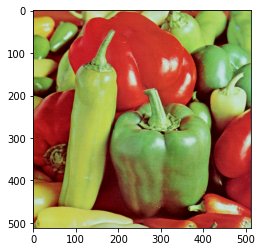

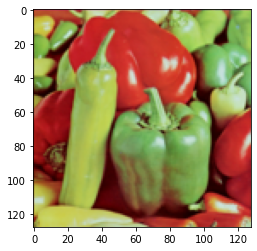

<IPython.core.display.Javascript object>

In [3]:
A_large = mpimg.imread("src/k_means/peppers-large.tiff")
plt.imshow(A_large)
plt.show()

A_small = mpimg.imread("src/k_means/peppers-small.tiff")
plt.imshow(A_small)
plt.show()

[INFO] Loaded small image with shape: (128, 128, 3)
[INFO] Centroids initialized
Updating centroids ...
loss at iter 0: 13583.678976341007
loss at iter 10: 9586.853764770623
loss at iter 20: 9511.30475741981
loss at iter 30: 9493.113057046583
loss at iter 40: 9482.987657597714
loss at iter 50: 9471.852748152234
loss at iter 60: 9460.894782649622
loss at iter 70: 9459.084586292436
loss at iter 80: 9458.019621943733
loss converged at iter 87
loss at iter 90: 9459.628631478576
loss at iter 100: 9459.628631478576
loss at iter 110: 9459.628631478576
loss at iter 120: 9459.628631478576
loss at iter 130: 9459.628631478576
loss at iter 140: 9459.628631478576


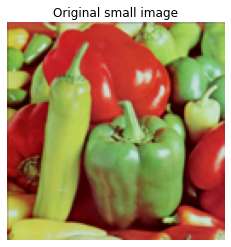

<IPython.core.display.Javascript object>

In [4]:
# Setup
max_iter = 150
print_every = 10
image_path_small = "src/k_means/peppers-small.tiff"
image_path_large = "src/k_means/peppers-large.tiff"
num_clusters = 16
figure_idx = 0

# Load small image
image = np.copy(mpimg.imread(image_path_small))
print("[INFO] Loaded small image with shape: {}".format(np.shape(image)))
plt.figure(figure_idx)
figure_idx += 1
plt.imshow(image)
plt.title("Original small image")
plt.axis("off")
# savepath = os.path.join(".", "orig_small.png")
# plt.savefig(savepath, transparent=True, format="png", bbox_inches="tight")

# Initialize centroids
print("[INFO] Centroids initialized")
centroids_init = init_centroids(num_clusters, image)

# Update centroids
print(25 * "=")
print("Updating centroids ...")
print(25 * "=")
centroids = update_centroids(centroids_init, image, max_iter, print_every)

[INFO] Loaded large image with shape: (512, 512, 3)
Updating large image ...

COMPLETE


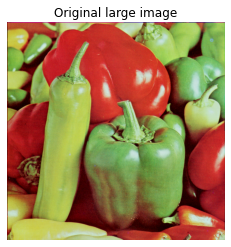

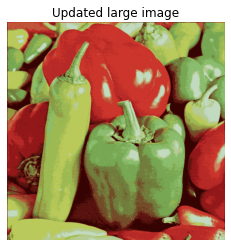

<IPython.core.display.Javascript object>

In [5]:
# Load large image
image = np.copy(mpimg.imread(image_path_large))
image.setflags(write=1)
print("[INFO] Loaded large image with shape: {}".format(np.shape(image)))
plt.figure(figure_idx)
figure_idx += 1
plt.imshow(image)
plt.title("Original large image")
plt.axis("off")
# savepath = os.path.join(".", "orig_large.png")
# plt.savefig(fname=savepath, transparent=True, format="png", bbox_inches="tight")

# Update large image with centroids calculated on small image
print(25 * "=")
print("Updating large image ...")
print(25 * "=")
image_clustered = update_image(image, centroids)

plt.figure(figure_idx)
figure_idx += 1
plt.imshow(image_clustered.round())
plt.title("Updated large image")
plt.axis("off")
# savepath = os.path.join(".", "updated_large.png")
# plt.savefig(fname=savepath, transparent=True, format="png", bbox_inches="tight")

print("\nCOMPLETE")
plt.show()

To represent 16 colors, we only need $\log_2{16}=4$ bits. Therefore, we have reduced the image size by a factor of $\frac{4}{24} = 6$.

# Question 4 (Semi-supervised EM)

In [6]:
from src.semi_supervised_em import gmm

<IPython.core.display.Javascript object>

Running unsupervised EM algorithm...
Converged after: 165 iterations


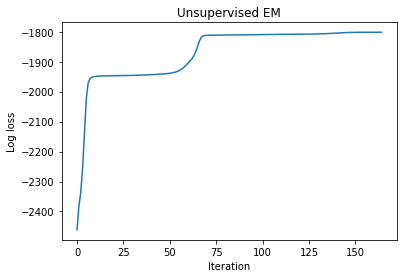

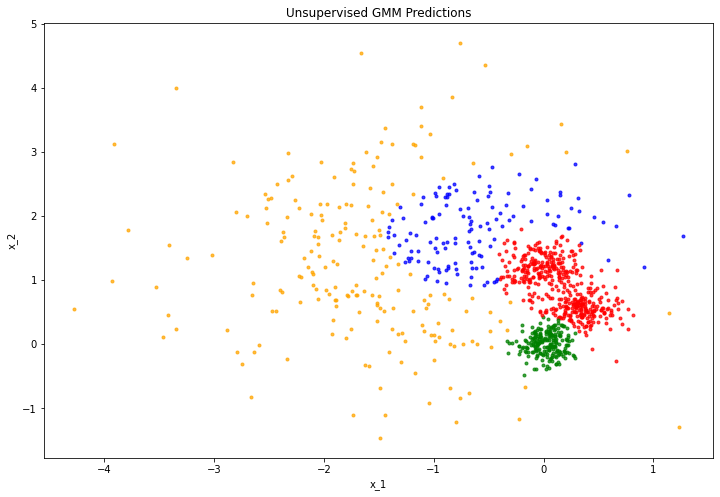

Running semi-supervised EM algorithm...
Converged after: 42 iterations


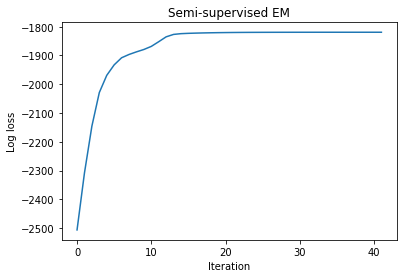

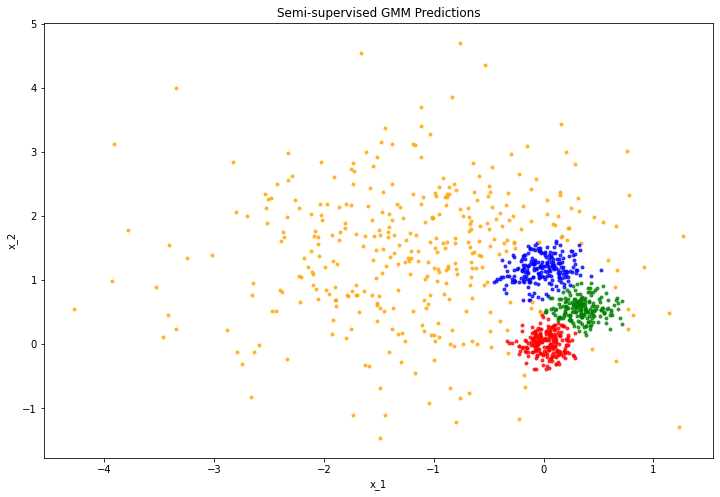

Running unsupervised EM algorithm...
Converged after: 122 iterations


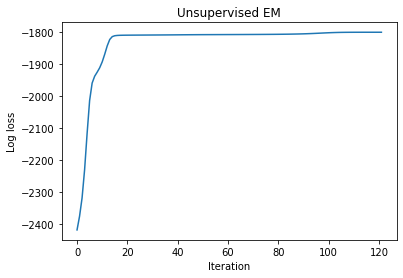

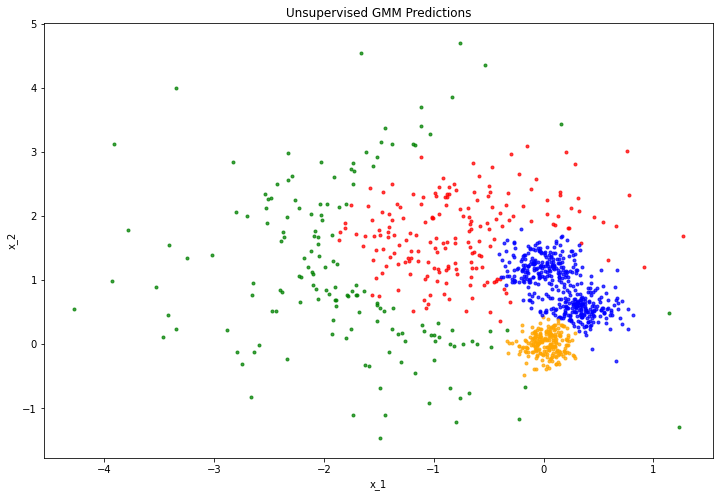

Running semi-supervised EM algorithm...
Converged after: 22 iterations


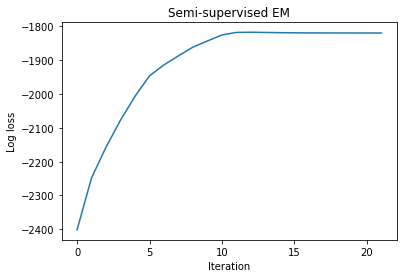

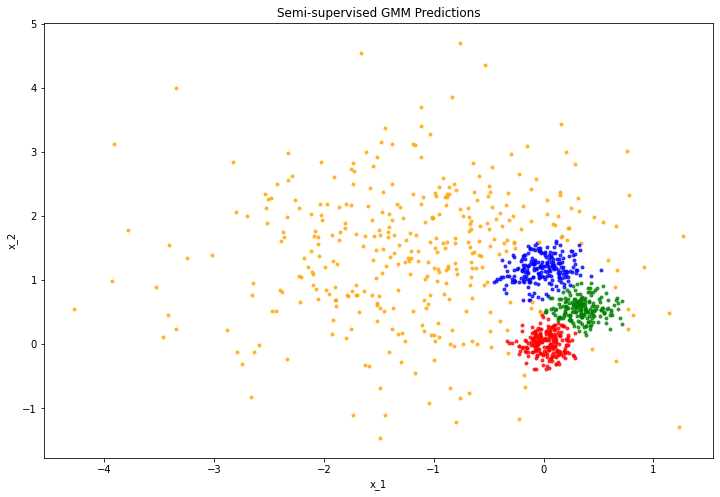

Running unsupervised EM algorithm...
Converged after: 245 iterations


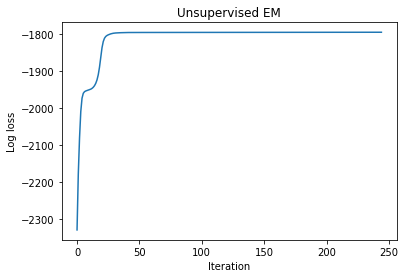

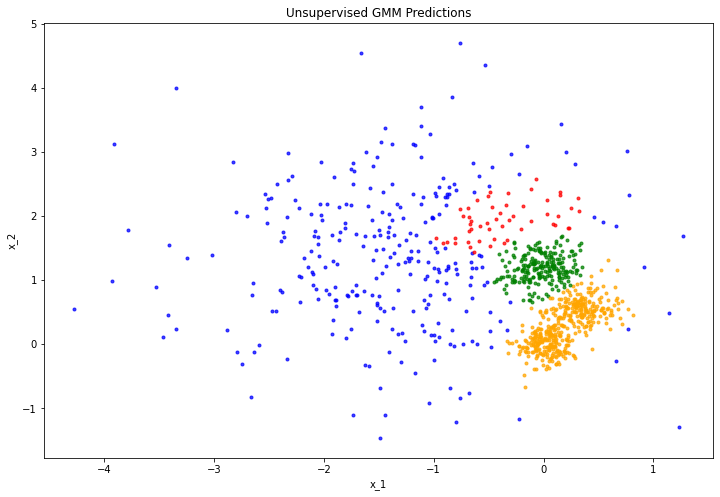

Running semi-supervised EM algorithm...
Converged after: 41 iterations


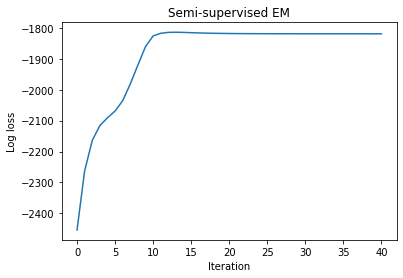

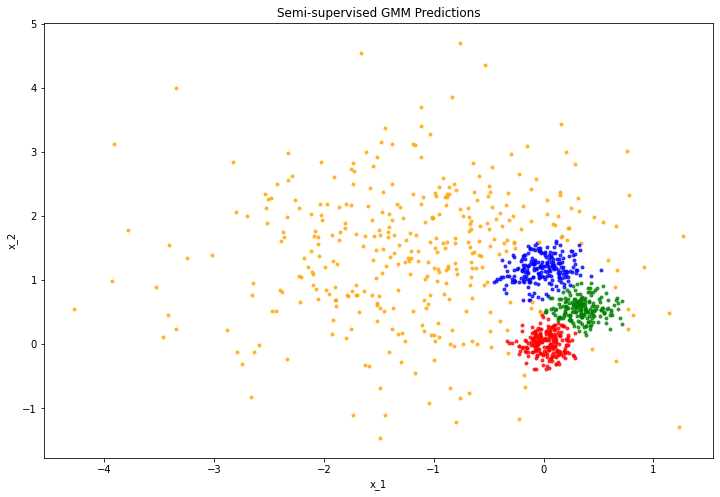

<IPython.core.display.Javascript object>

In [7]:
np.random.seed(229)
# Run NUM_TRIALS trials to see how different initializations
# affect the final predictions with and without supervision
for t in range(gmm.NUM_TRIALS):
    gmm.main(is_semi_supervised=False, trial_num=t)

    # *** START CODE HERE ***
    # Once you've implemented the semi-supervised version,
    # uncomment the following line.
    # You do not need to add any other lines in this code block.
    gmm.main(is_semi_supervised=True, trial_num=t)
    # *** END CODE HERE ***


1. Semi-supervised EM takes significantly less number of iterations to converge. This is expected because data with labels provide more information about the underlying structures.  
2. The cluster assignments for unsupervised EM are definitely not as stable as semi-supervised EM. This can be seen from how the assignments for the scattered points change significantly between different iterations or the assignments for the small clusters in the corner are clustered in different groups.
3. Semi-supervised EM provides a better quality of assignments. This is because it's extremely difficult to tell whether some examples belong to the same group without the ground-truth labels as observed from the 3 small clusters formed in lower right of the plots.

# Question 5

# Question 6 (Independent Component Analysis)

![6a](answers/6a.png)

![6b](answers/6b.png)

In [8]:
from src.ica import ica

<IPython.core.display.Javascript object>

In [9]:
ica.main()

(53442, 5)
Separating tracks ...
0.1
0.1
0.1
0.05
0.05
0.05
0.02
0.02
0.01
0.01
0.005
0.005
0.002
0.002
0.001
0.001
[[ 52.83492974  16.79598806  19.9411949  -10.19841036 -20.8977174 ]
 [ -9.9368057   -0.97879563  -4.68186342   8.0430365    1.79099473]
 [  8.31143332  -7.47699382  19.31554724  15.17460858 -14.32640472]
 [-14.66729873 -26.64481368   2.44071692  21.38223128  -8.42094492]
 [ -0.26917605  18.37373974   9.31200636   9.10275731  30.59390495]]


<IPython.core.display.Javascript object>

    import IPython
    IPython.display.Audio("split_0.wav")
    IPython.display.Audio("split_1.wav")
    IPython.display.Audio("split_2.wav")
    IPython.display.Audio("split_3.wav")
    IPython.display.Audio("split_4.wav")